In [ ]:
#install kaggle
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

!unzip new-plant-diseases-dataset.zip

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow
import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
from tensorflow import keras
#from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
test_path  = os.path.join("/content/test", "test")

In [ ]:
diseases = os.listdir(train_dir)
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Corn_(maize)___healthy,1859
Tomato___Septoria_leaf_spot,1745
Apple___Apple_scab,2016
"Pepper,_bell___healthy",1988
Blueberry___healthy,1816
Grape___Leaf_blight_(Isariopsis_Leaf_Spot),1722
Grape___Esca_(Black_Measles),1920
Tomato___Bacterial_spot,1702
Potato___healthy,1824
Potato___Late_blight,1939


Text(0.5, 1.0, 'Images per each class of plant disease')

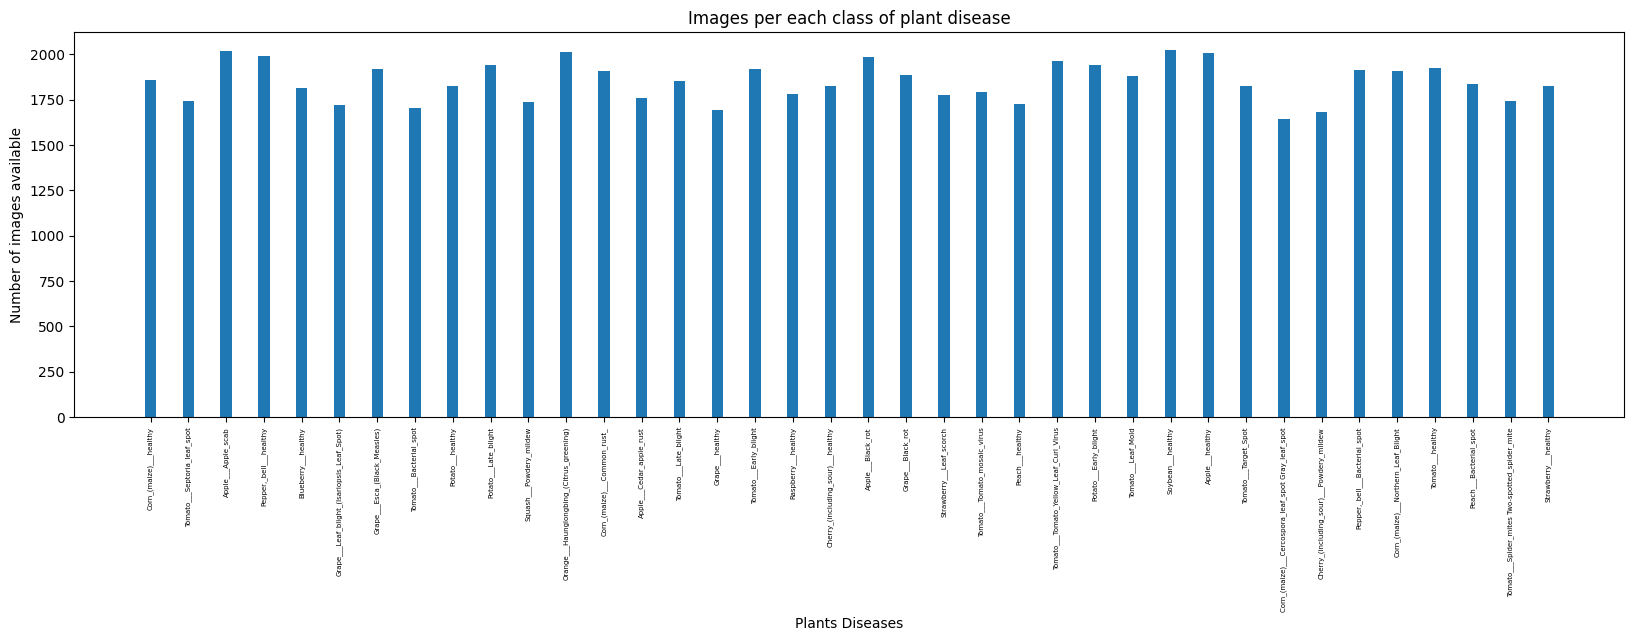

In [ ]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants Diseases', fontsize=10)
plt.ylabel('Number of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [ ]:
train_datagen= ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1/255.0,
    fill_mode='nearest',
    validation_split=0.1)
val_datagen= ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255.0,
    validation_split=0.1)
train= train_datagen.flow_from_directory(train_dir,batch_size=128,target_size=(210,210),color_mode='rgb',class_mode='categorical',seed=42)
valid=val_datagen.flow_from_directory(valid_dir,batch_size=128,target_size=(210,210),color_mode='rgb',class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


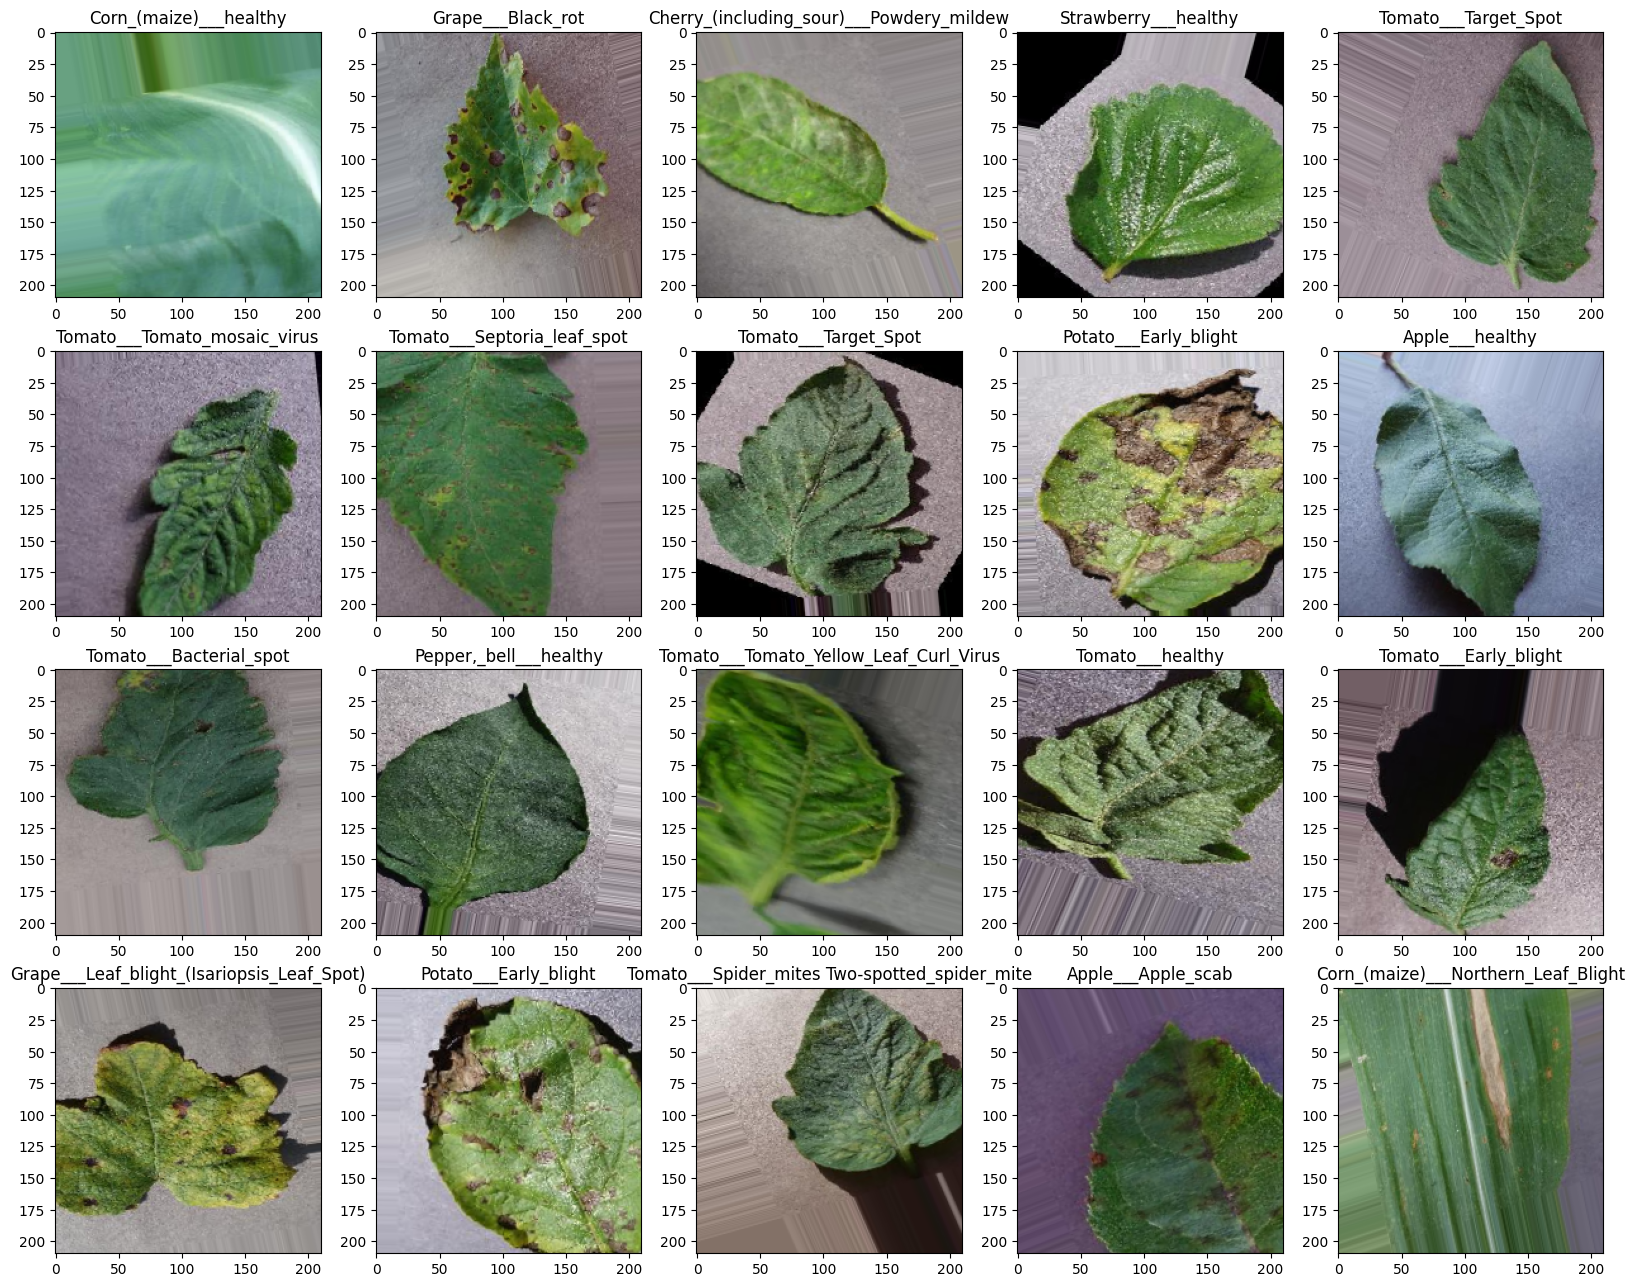

In [ ]:
classes=list(train.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train:
    for i in range(0,20):
        plt.subplot(5,5,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.show()
    break

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,3,activation="relu",padding="same",input_shape=(210,210,3)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64,3,activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D())
model.add(BatchNormalization())
model.add(keras.layers.Conv2D(128,3,activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D())
model.add(BatchNormalization())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(38,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 210, 210, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 210, 210, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 105, 105, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 52, 52, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train,validation_data=valid,epochs = 6)

Epoch 1/6
550/550 [==============================] - 1155s 2s/step - loss: 2.0789 - accuracy: 0.4774 - val_loss: 6.5686 - val_accuracy: 0.2892
Epoch 2/6
550/550 [==============================] - 1088s 2s/step - loss: 0.8707 - accuracy: 0.7336 - val_loss: 1.0935 - val_accuracy: 0.6973
Epoch 3/6
550/550 [==============================] - 1079s 2s/step - loss: 0.5541 - accuracy: 0.8268 - val_loss: 0.5845 - val_accuracy: 0.8125
Epoch 4/6
550/550 [==============================] - 1034s 2s/step - loss: 0.4011 - accuracy: 0.8741 - val_loss: 0.5523 - val_accuracy: 0.8334
Epoch 5/6
550/550 [==============================] - 1027s 2s/step - loss: 0.3264 - accuracy: 0.8974 - val_loss: 1.5885 - val_accuracy: 0.6523
Epoch 6/6
550/550 [==============================] - 1021s 2s/step - loss: 0.2707 - accuracy: 0.9158 - val_loss: 0.9342 - val_accuracy: 0.7742


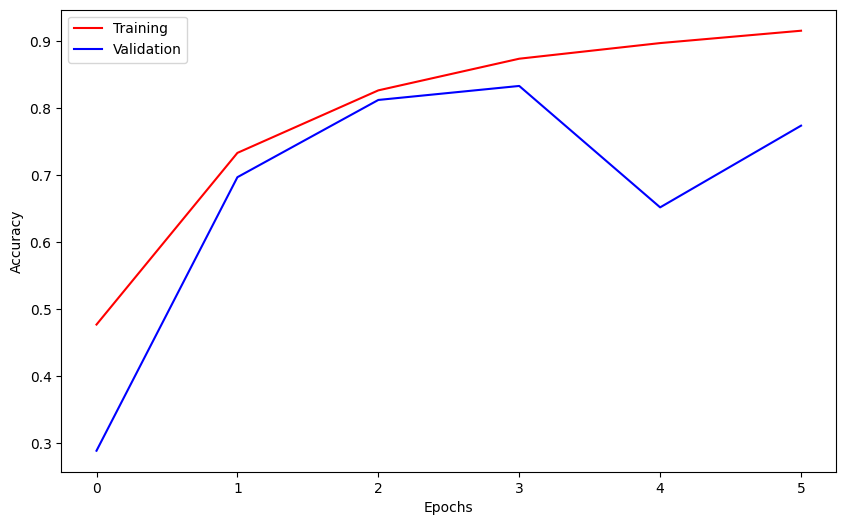

In [ ]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
model.save("model1.h5")

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))

Train Accuracy  : 91.58 %
